In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum, start=pd.to_datetime('2021-05-17'))

Latest for England:
1,852 cases (7 day average) as of Wed 12 May, -46.7 since Tue 11 May
81 hospitalised (7 day average) as of Wed 12 May, +0.0 since Wed 12 May
8 died (7 day average) as of Wed 12 May, -0.4 since Tue 11 May


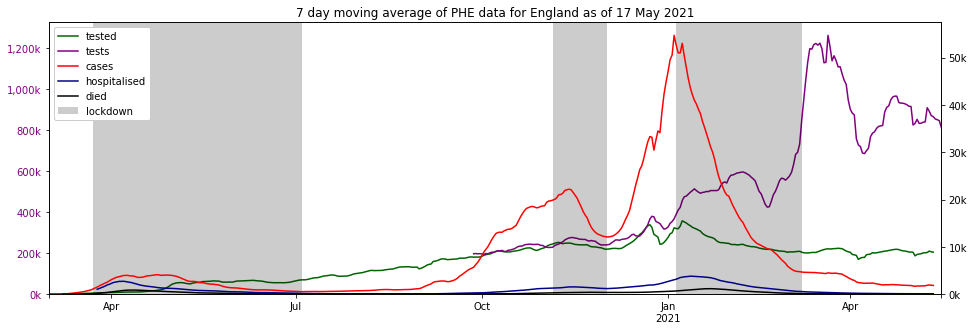

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

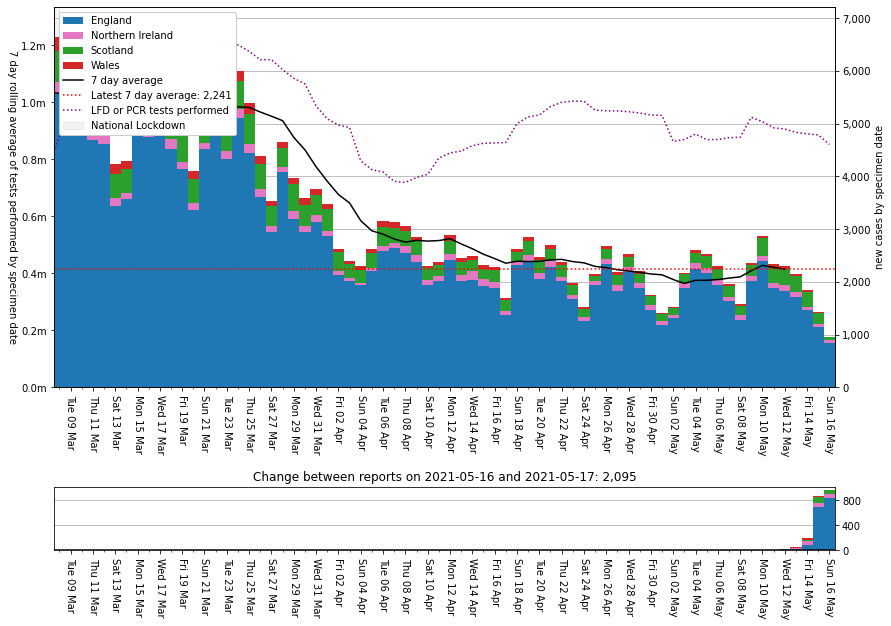

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

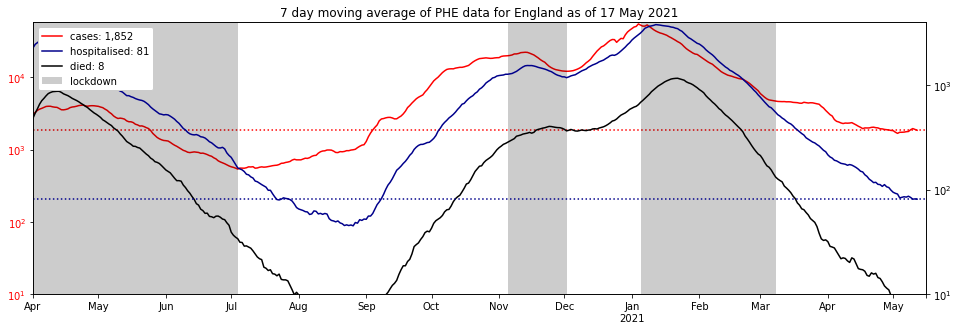

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

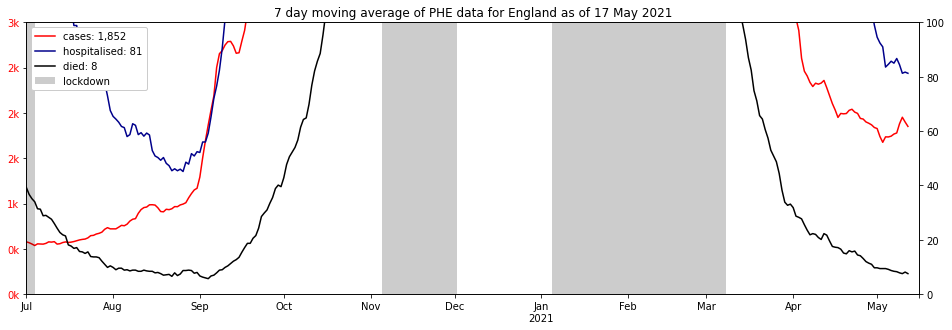

In [21]:
plot_summary(earliest_date='2020-07-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=3_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=100)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,16 May 21,"+17,172,209","+30,643,474","+17,172,209","+157,687","+105,520","+157,687"
Northern Ireland,16 May 21,"+559,227","+997,605","+559,227","+6,796","+1,700","+6,796"
Scotland,16 May 21,"+1,638,536","+3,035,790","+1,638,536","+17,505","+15,455","+17,505"
Wales,16 May 21,"+917,431","+2,027,803","+917,431","+1,757","+8,643","+1,757"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,17172209.0,30643474.0,13471265.0,56286961,30.508325,23.933189,45.558486
1,Northern Ireland,N92000002,559227.0,997605.0,438378.0,1893667,29.531433,23.149688,47.318879
2,Scotland,S92000003,1638536.0,3035790.0,1397254.0,5463300,29.991690,25.575275,44.433035
3,Wales,W92000004,917431.0,2027803.0,1110372.0,3152879,29.098199,35.217717,35.684084


'partial: 36,704,672 (54.9%), full: 20,287,403'

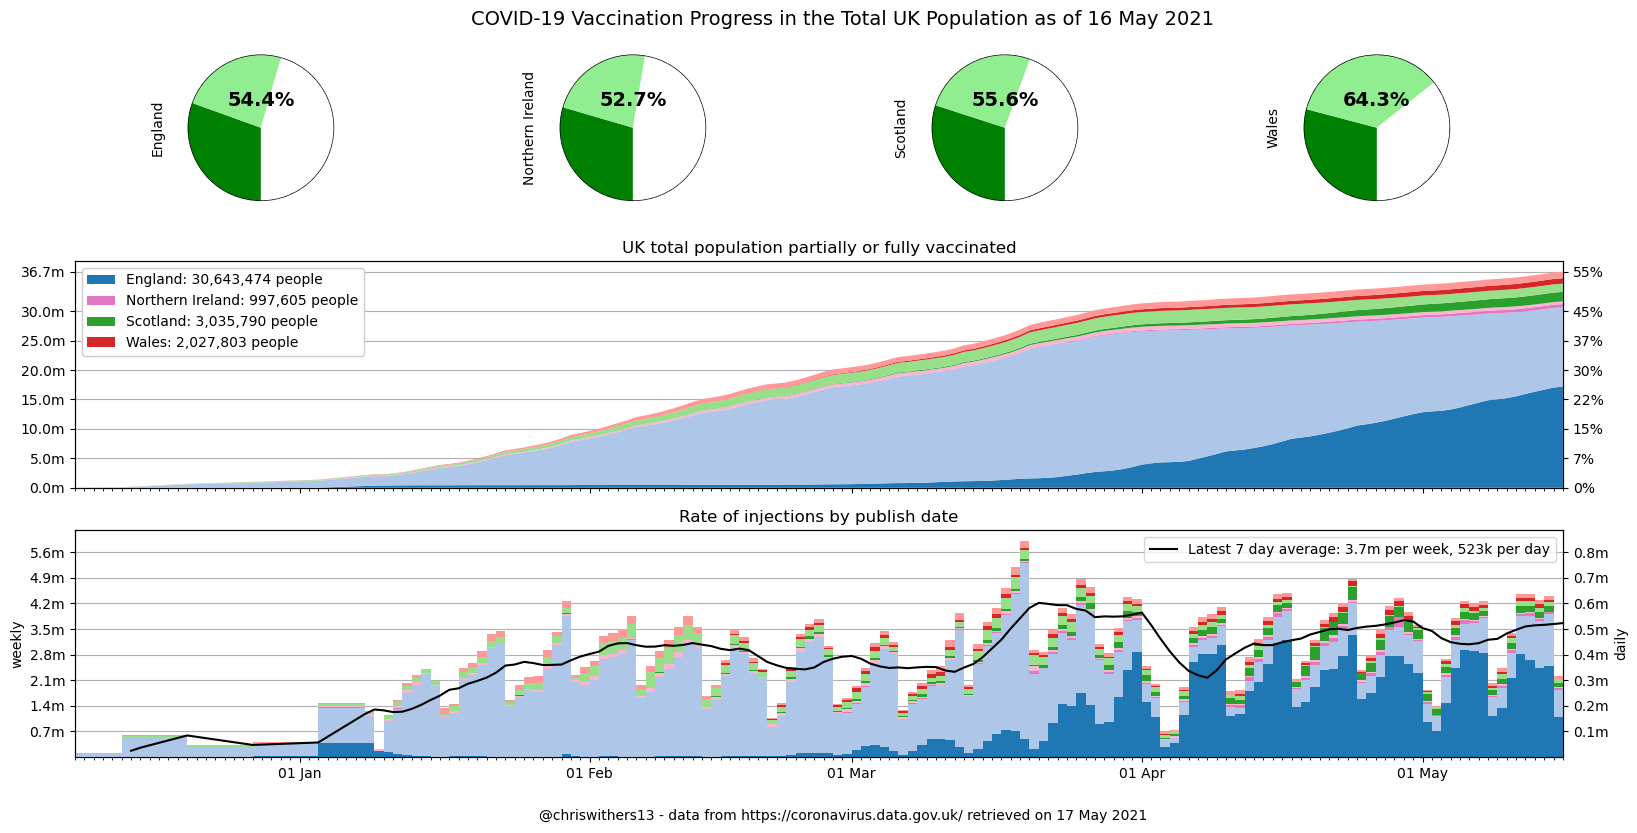

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

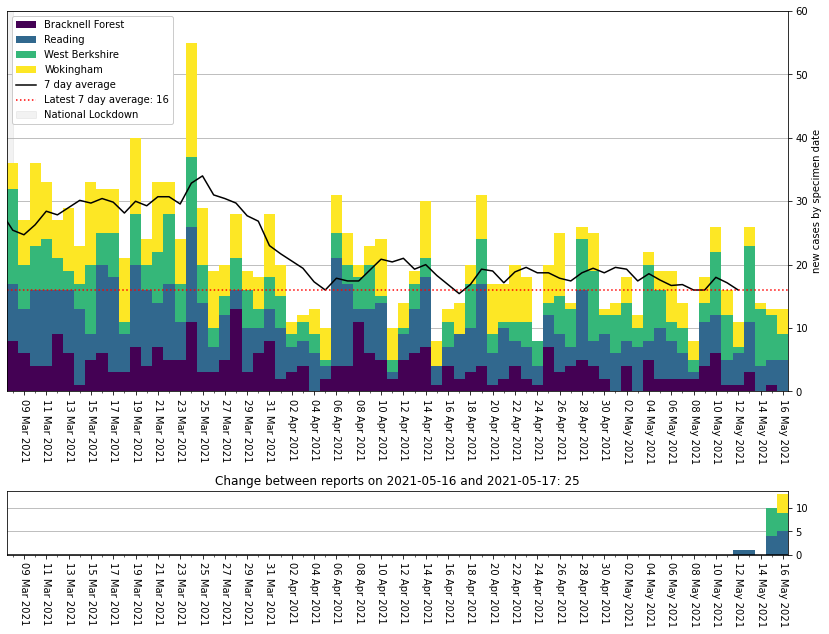

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], ylim=60)

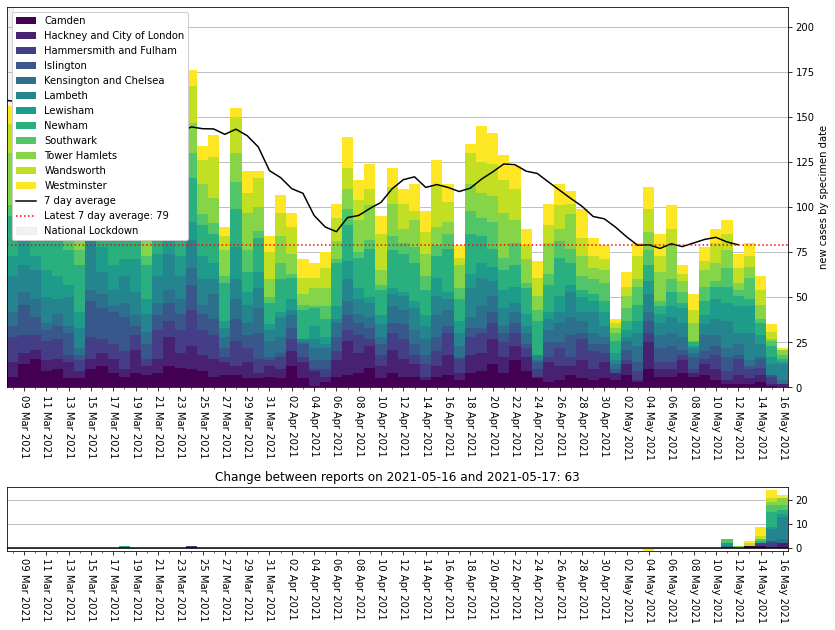

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1])

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,290.036515,834.0,2021-05-16
E06000008,Blackburn with Darwen,134.272125,201.0,2021-05-16
E06000055,Bedford,117.720379,204.0,2021-05-16
N09000005,Derry City and Strabane,99.812274,151.0,2021-05-16
S12000049,Glasgow City,96.190296,609.0,2021-05-16
S12000011,East Renfrewshire,87.930493,84.0,2021-05-16
E08000034,Kirklees,68.442223,301.0,2021-05-16
E07000117,Burnley,59.604139,53.0,2021-05-16
S12000019,Midlothian,50.832793,47.0,2021-05-16


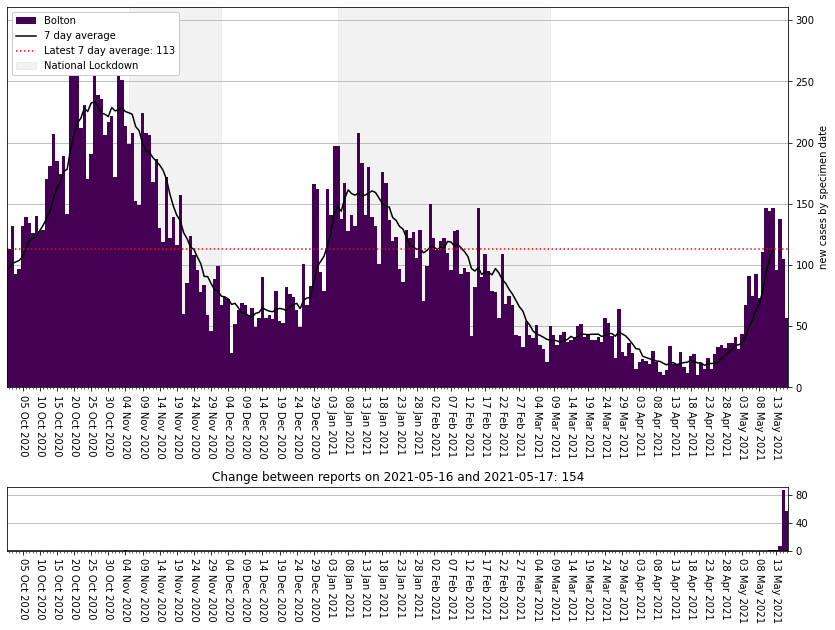

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,290.036515,834.0,2021-05-16
S12000049,Glasgow City,96.190296,609.0,2021-05-16
E08000035,Leeds,38.580879,306.0,2021-05-16
E08000034,Kirklees,68.442223,301.0,2021-05-16
E08000019,Sheffield,40.181037,235.0,2021-05-16
E08000003,Manchester,41.602003,230.0,2021-05-16
E06000055,Bedford,117.720379,204.0,2021-05-16
E06000008,Blackburn with Darwen,134.272125,201.0,2021-05-16
E08000032,Bradford,35.755573,193.0,2021-05-16


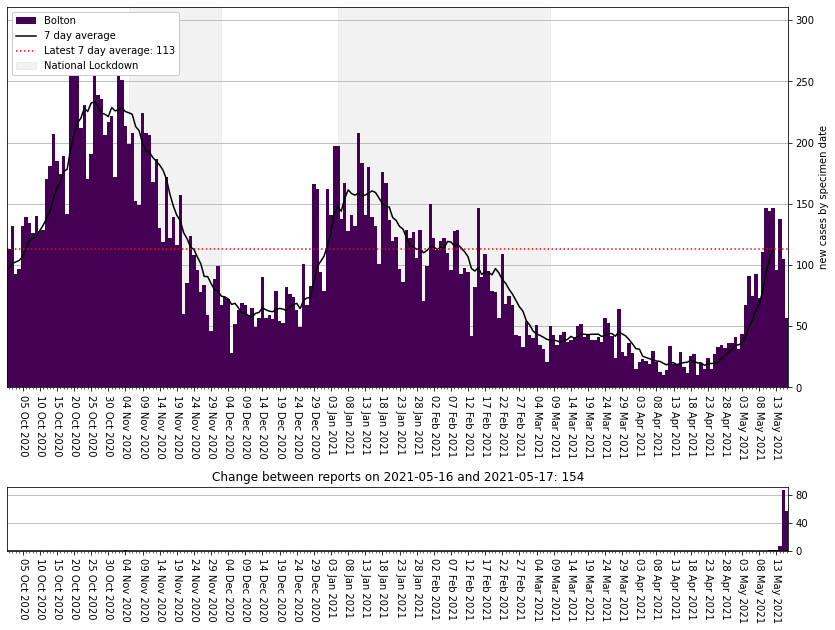

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.6
phe_max = 0.25

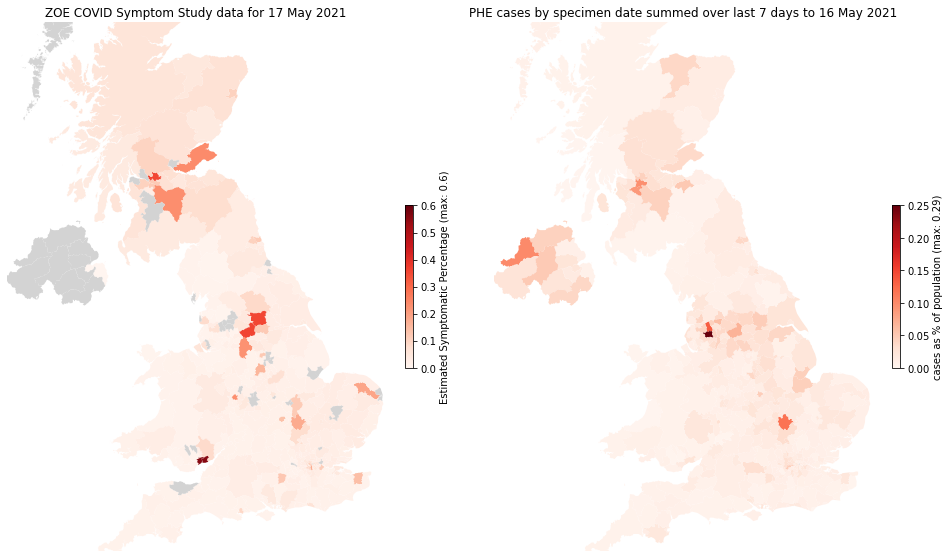

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...